<p> Module Code: ST1510 PDAS
<p> Name: Yadanar Aung</p>
<p> Admin No.: P2214621</P>
<p> Class: DAAA/FT/1B/02</p>
<p> Theme: Environment, Singapore's Waste Management </p>
<h3> CA2 Assignment Cleaning & Wrangling</h3>

<hr>
<h4>Import Libraries</h4>

In [2]:
# ** Import Libraries **

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<hr>
<h4>Load & Initialise Datasets</h4>

In [3]:
# ** Load & Initialise Datasets **
# Reading data from multiple sources

df1 = pd.read_csv("data/original datasets/2003_2017_waste.csv", sep = ",")
df2 = pd.read_csv("data/original datasets/2018_2020_waste.csv", sep = ",")
df3 = pd.read_csv("data/original datasets/ghg-emissions.csv", sep = ",", skiprows = [5, 6])
df4 = pd.read_csv("data/original datasets/solid-waste-management-total-waste-incinerated.csv", index_col = 0)
df5 = pd.read_csv("data/original datasets/solid-waste-management-total-waste-landfilled-annual.csv", index_col = 0)

<hr>
<h2><strong>Dataset 1 (2003_2017_waste.csv)</strong></h2>

<h4>Nature of Dataset 1</h4>

In [4]:
# ** Nature of dataset 1 (2003_2017_waste.csv) **

# 1st look at first 5 rows of dataset 1
df1.head()
# We can see that the year is not sort in order, as suggested in the filename that the years run from 2003 to 2017

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,679900,111100.0,791000,0.14,2016
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016
2,Plastics,762700,59500.0,822200,0.07,2016
3,C&D,9700,1585700.0,1595400,0.99,2016
4,Horticultural waste,111500,209000.0,320500,0.65,2016


In [5]:
# 1st look at last 5 rows of dataset 1
df1.tail()
# The last row shows the total data for that specific year

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
220,Ash and sludge,214800,28600.0,243400,0.12,2017
221,Plastic,763400,51800.0,815200,0.06,2017
222,Textile/Leather,141200,9600.0,150800,0.06,2017
223,"Others (stones, ceramic, rubber, etc.)",319300,7100.0,326400,0.02,2017
224,Total,2980000,4724300.0,7704300,0.61,2017


We can see that the year is not sort in order, as suggested in the filename that the years run from 2003 to 2017

<hr>
<h4>Information of Dataset 1</h4>
(A) No. of Rows & Columns
(B) Column Names & Dtypes

In [6]:
# View information of dataset 1, use .info() to retrieve
# (A) number of rows & columns
# (B) column names & dtypes

print("**** Singapore Waste Management from 2013 to 2017 ****")
print("\nInformation of dataset 1")
df1.info()

**** Singapore Waste Management from 2013 to 2017 ****

Information of dataset 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   waste_type                   225 non-null    object 
 1   waste_disposed_of_tonne      225 non-null    int64  
 2   total_waste_recycled_tonne   225 non-null    float64
 3   total_waste_generated_tonne  225 non-null    int64  
 4   recycling_rate               225 non-null    float64
 5   year                         225 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 10.7+ KB


<hr>
<h4>Summary Descriptive Statistics of Dataset 1</h4>

In [7]:
# Summary Statistics
# subset columns to remove "year" col as we want descriptive summaries
df1_summaryStats = df1[df1['waste_type'] != 'Total']
for col in df1_summaryStats.columns[:-1]:
    print(f"** {col} descriptive summary **")
    print(df1_summaryStats[col].describe(include="all", datetime_is_numeric=True), "\n\n")
# when we look at the waste_type descriptive summary
# there're 32 unique values, with paper/cardboard having the top freq
# indicating that there are varied naming conventions in the dataset

** waste_type descriptive summary **
count                 210
unique                 31
top       Paper/Cardboard
freq                   15
Name: waste_type, dtype: object 


** waste_disposed_of_tonne descriptive summary **
count       210.000000
mean     198063.809524
std      233279.542609
min        1300.000000
25%       21275.000000
50%       97350.000000
75%      302775.000000
max      789000.000000
Name: waste_disposed_of_tonne, dtype: float64 


** total_waste_recycled_tonne descriptive summary **
count    2.100000e+02
mean     2.623386e+05
std      3.859373e+05
min      0.000000e+00
25%      1.615000e+04
50%      8.085000e+04
75%      3.604000e+05
max      1.683000e+06
Name: total_waste_recycled_tonne, dtype: float64 


** total_waste_generated_tonne descriptive summary **
count    2.100000e+02
mean     4.604019e+05
std      4.252278e+05
min      1.440000e+04
25%      1.144250e+05
50%      2.961000e+05
75%      7.244750e+05
max      1.695300e+06
Name: total_waste_generated_to

<hr>
<h2><strong>Dataset 2 (2018_2020_waste.csv)</strong></h2>

<h4>Nature of Dataset 2</h4>

In [8]:
# ** Nature of dataset 2 (20018_2020_waste.csv) **

# 1st look at first 5 rows of dataset 2
df2.head()

,Waste Type,Total Generated ('000 tonnes),Total Recycled ('000 tonnes),Year
0,Construction& Demolition,1624,1618,2018
1,Ferrous Metal,1269,1260,2018
2,Paper/Cardboard,1054,586,2018
3,Plastics,949,41,2018
4,Food,763,126,2018


In [9]:
# 1st look at last 5 rows of dataset 2
df2.tail()

,Waste Type,Total Generated ('000 tonnes),Total Recycled ('000 tonnes),Year
40,Non-ferrous metal,75,73,2020
41,Glass,66,7,2020
42,Scrap tyres,23,22,2020
43,"Others (stones, ceramics, etc.)",193,21,2020
44,Overall,5880,3040,2020


<hr>
<h4>Information of Dataset 2</h4>
(A) No. of Rows & Columns
(B) Column Names & Dtypes

In [10]:
# View information of dataset 2, use .info() to retrieve
# (A) number of rows & columns
# (B) column names & dtypes

print("**** Singapore Waste Management from 2018 to 2020 ****")
print("\nInformation of dataset 2")
df2.info()

**** Singapore Waste Management from 2018 to 2020 ****

Information of dataset 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Waste Type                     45 non-null     object
 1   Total Generated ('000 tonnes)  45 non-null     int64 
 2   Total Recycled ('000 tonnes)   45 non-null     int64 
 3   Year                           45 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ KB


<hr>
<h4>Summary Descriptive Statistics of Dataset 2</h4>

In [11]:
# Summary Statistics

# subset columns to remove "year" col as we want descriptive summaries
df2_summaryStats = df2[df2['Waste Type'] != 'Overall']
for col in df2_summaryStats.columns[:-1]:
    print(f"** {col} descriptive summary **")
    print(df2_summaryStats[col].describe(include="all", datetime_is_numeric=True), "\n\n")    
    
# when we look at the waste_type descriptive summary
# there're 22 unique values, with glass having the top freq of 3
# indicating that there are varied naming conventions in the dataset
# since 22 x 3 != 45, assuming no varied naming conventions
#sns.histplot(x = df2_summaryStats["Total Generated ('000 tonnes)"], kde=True)
#plt.show()

** Waste Type descriptive summary **
count        42
unique       21
top       Glass
freq          3
Name: Waste Type, dtype: object 


** Total Generated ('000 tonnes) descriptive summary **
count      42.000000
mean      495.452381
std       447.544967
min        23.000000
25%       144.750000
50%       295.000000
75%       857.250000
max      1624.000000
Name: Total Generated ('000 tonnes), dtype: float64 


** Total Recycled ('000 tonnes) descriptive summary **
count      42.00000
mean      286.00000
std       424.37926
min         6.00000
25%        22.75000
50%       125.00000
75%       292.00000
max      1618.00000
Name: Total Recycled ('000 tonnes), dtype: float64 




<hr>
<h5>Dataset 1 & 2 are related to Waste Management across the years & mostly have common columns</h5>
<h5>Hence, we are going to <strong>concatenate the two datasets together</strong><h5>
<h2><strong><u>Pre-Process</u> & <u>Clean</u> Datasets 1 & 2</strong></h2>
# Identify and handle missing values<br>
# Identify and handle outliers<br>
# Standardise Column Names & Values<br>
# Writing final cleaned dataset to a file<br>

<hr>
<h4>(A) Checking for Missing Values in both Datasets</h4>

In [12]:
# (A) Check for missing values in both Datasets **

print('** Detecting Missing Values in Dataset 1 **')
print(df1.isnull().sum())
print('\n** Detecting Missing Values in Dataset 2 **')
print(df2.isnull().sum())
# there are no missing values
# but we will have to check again after merging the datasets

** Detecting Missing Values in Dataset 1 **
waste_type                     0
waste_disposed_of_tonne        0
total_waste_recycled_tonne     0
total_waste_generated_tonne    0
recycling_rate                 0
year                           0
dtype: int64

** Detecting Missing Values in Dataset 2 **
Waste Type                       0
Total Generated ('000 tonnes)    0
Total Recycled ('000 tonnes)     0
Year                             0
dtype: int64


There're currently no missing values
<br>But we will check again after concatentating

<hr>
<h4>(B) Check if values are represented consistently across both datasets</h4>

In [13]:
# (B) Check if dtypes & values are consistent across both datasets **
print('** Dtypes of Dataset 1 **')
print(df1.dtypes)
print('\n** Dtypes of Dataset 2 **')
print(df2.dtypes)

** Dtypes of Dataset 1 **
waste_type                      object
waste_disposed_of_tonne          int64
total_waste_recycled_tonne     float64
total_waste_generated_tonne      int64
recycling_rate                 float64
year                             int64
dtype: object

** Dtypes of Dataset 2 **
Waste Type                       object
Total Generated ('000 tonnes)     int64
Total Recycled ('000 tonnes)      int64
Year                              int64
dtype: object


Previously looking at the first 5 rows of both datasets,
<br>We can see that in dataset 2, the values were represented in tonnes
<br>Whereas in dataset 1, the values were represented in full numerical form

<h5>Correct Values under 'Total Generated' & 'Total Recycled' in Dataset 2</h5>

In [14]:
# Correct Values under 'Total Generated' & 'Total Recycled'
df2["Total Generated ('000 tonnes)"] = df2["Total Generated ('000 tonnes)"] * 1000
df2["Total Recycled ('000 tonnes)"] = df2["Total Recycled ('000 tonnes)"] * 1000
df2.head()

,Waste Type,Total Generated ('000 tonnes),Total Recycled ('000 tonnes),Year
0,Construction& Demolition,1624000,1618000,2018
1,Ferrous Metal,1269000,1260000,2018
2,Paper/Cardboard,1054000,586000,2018
3,Plastics,949000,41000,2018
4,Food,763000,126000,2018


<hr>
<h4>(C) Standardise Column Names</h4>

In [15]:
# (C) Standardise the Column Names **
# We'll first start off by standardising the column Names to make it easier to see the similarity between the datasets

# Retrieve Column Names
print('** Columns in Dataset 1 **')
print(df1.columns)
print('\n** Columns in Dataset 2 **')
print(df2.columns)

# Standardise Column Names
df1 = df1.rename(columns = {"waste_type":"Waste Type", "waste_disposed_of_tonne":"Total Waste Disposed",
                 "total_waste_recycled_tonne":"Total Waste Recycled",
                 "total_waste_generated_tonne":"Total Waste Generated", 
                 "recycling_rate":"Recycling Rate", "year":"Year"})

df2 = df2.rename(columns = {"Total Generated ('000 tonnes)":"Total Waste Generated",
                 "Total Recycled ('000 tonnes)":"Total Waste Recycled"})

** Columns in Dataset 1 **
Index(['waste_type', 'waste_disposed_of_tonne', 'total_waste_recycled_tonne',
       'total_waste_generated_tonne', 'recycling_rate', 'year'],
      dtype='object')

** Columns in Dataset 2 **
Index(['Waste Type', 'Total Generated ('000 tonnes)',
       'Total Recycled ('000 tonnes)', 'Year'],
      dtype='object')


<hr>
<h4>(D) Check for Unique Values under "Waste type" in both datasets</h4>

1st, we'll check for the frequency of years for each year under the column "Year" in both datasets
<br> This will allows us to gauge how many unqiue waste types there should be

In [16]:
# (D) Check Unqiue Values under "Waste type" under both datasets **

# First, let's look at the frequency of the years in both datasets
# this gives us the idea that there're supposed to be 15 unqiue values under "Waste Type"
print("** Frequency of Years Under Waste Type in Dataset 1 **")
print(df1.groupby('Year')["Waste Type"].count())
print("\n** Frequency of Years Under Waste Type in Dataset 2 **")
print(df2.groupby('Year')["Waste Type"].count())

** Frequency of Years Under Waste Type in Dataset 1 **
Year
2003    15
2004    15
2005    15
2006    15
2007    15
2008    15
2009    15
2010    15
2011    15
2012    15
2013    15
2014    15
2015    15
2016    15
2017    15
Name: Waste Type, dtype: int64

** Frequency of Years Under Waste Type in Dataset 2 **
Year
2018    15
2019    15
2020    15
Name: Waste Type, dtype: int64


Hence, there should only be 15 unique values under "Waste Type"

Now, let's get the latest naming conventions from 2020
<br>And view all unique values under "Waste Type" in both datasets

In [17]:
# View the Unique Values in each Dataset
print("** Unique Values in Dataset 1 **")
print(f" Total No.: {len(df1['Waste Type'].unique())}\n\n", df1["Waste Type"].unique())
print("\n\n** Unique Values in Dataset 2 **")
print(f" Total No.: {len(df2['Waste Type'].unique())}\n\n", df2["Waste Type"].unique())

# Get Latest Naming Conventions from 2020
df2_2020 = df2[df2["Year"] == 2020]["Waste Type"].unique().tolist()
print("\n** Latest Naming Convention **", f"\nTotal No.: {len(df2_2020)}\n\n", df2_2020)

** Unique Values in Dataset 1 **
 Total No.: 32

 ['Food' 'Paper/Cardboard' 'Plastics' 'C&D' 'Horticultural waste' 'Wood'
 'Ferrous metal' 'Non-ferrous metal' 'Used slag' 'Ash & Sludge' 'Glass'
 'Textile/Leather' 'Scrap tyres' 'Others (stones, ceramics & rubber etc.)'
 'Total' 'Others (stones, ceramics & rubber etc)' 'Food waste'
 'Construction Debris' 'Wood/Timber' 'Horticultural Waste' 'Ferrous Metal'
 'Non-ferrous Metals' 'Used Slag' 'Sludge' 'Scrap Tyres' 'Ferrous Metals'
 'Others' 'Construction debris' 'Non-ferrous metals' 'Ash and sludge'
 'Plastic' 'Others (stones, ceramic, rubber, etc.)']


** Unique Values in Dataset 2 **
 Total No.: 22

 ['Construction& Demolition' 'Ferrous Metal' 'Paper/Cardboard' 'Plastics'
 'Food' 'Wood' 'Horticultural' 'Ash & Sludge' 'Textile/Leather'
 'Used Slag' 'Non-Ferrous Metal' 'Glass' 'Scrap Tyres'
 'Others (stones, ceramic, rubber, ect)' 'Overall' 'Ferrous metal'
 'Construction & Demolition' 'Ash & sludge' 'Used slag'
 'Non-ferrous metal' 'Scrap t

Standardise Values under "Waste Type"

In [18]:
# Standardise Values under "Waste Type" using .replace()

# 1. Ash & sludge
df1 = df1.replace('Ash & Sludge', 'Ash & sludge')
df1 = df1.replace('Sludge', 'Ash & sludge')
df1 = df1.replace('Ash and sludge', 'Ash & sludge')
df2 = df2.replace('Ash & Sludge', 'Ash & sludge')

# 2. Construction & Demolition
df1 = df1.replace('C&D', 'Construction & Demolition')
df1 = df1.replace('Construction Debris', 'Construction & Demolition')
df1 = df1.replace('Construction debris', 'Construction & Demolition')
df2 = df2.replace('Construction& Demolition', 'Construction & Demolition')

# 3. Ferrous metal
df1 = df1.replace('Ferrous Metal', 'Ferrous metal')
df1 = df1.replace('Ferrous Metals', 'Ferrous metal')
df2 = df2.replace('Ferrous Metal', 'Ferrous metal')

# 4. Food
df1 = df1.replace('Food waste', 'Food')

# 5. Glass

# 6. Horticultural
df1 = df1.replace('Horticultural waste', 'Horticultural')
df1 = df1.replace('Horticultural Waste', 'Horticultural')

# 7. Non-ferrous metal
df1 = df1.replace('Non-ferrous Metals', 'Non-ferrous metal')
df1 = df1.replace('Non-ferrous metals', 'Non-ferrous metal')
df2 = df2.replace('Non-Ferrous Metal', 'Non-ferrous metal')

# 8. Others (stones, cermaics, etc.)
df1 = df1.replace('Others', 'Others (stones, ceramics, etc.)')
df1 = df1.replace('Others (stones, ceramics & rubber etc.)', 'Others (stones, ceramics, etc.)')
df1 = df1.replace('Others (stones, ceramics & rubber etc)', 'Others (stones, ceramics, etc.)')
df1 = df1.replace('Others (stones, ceramic, rubber, etc.)', 'Others (stones, ceramics, etc.)')
df2 = df2.replace('Others (stones, ceramic, rubber, ect)', 'Others (stones, ceramics, etc.)')

# 9. Overall
df1 = df1.replace('Total', 'Overall')

# 10. Paper/Cardboard

# 11. Plastics
df1 = df1.replace('Plastic', 'Plastics')

# 12. Scrap tyres
df1 = df1.replace('Scrap Tyres', 'Scrap tyres')
df2 = df2.replace('Scrap Tyres', 'Scrap tyres')

# 13. Textile/Leather

# 14. Used slag
df1 = df1.replace('Used Slag', 'Used slag')
df2 = df2.replace('Used Slag', 'Used slag')

# 15. Wood
df1 = df1.replace('Wood/Timber', 'Wood')

Check to ensure values under "Waste Type" are now consistent

In [19]:
# After standardising the Values in each Dataset
print("** Unique Values in Dataset 1 **")
print(f" Total No.: {len(df1['Waste Type'].unique())}\n\n", df1["Waste Type"].unique())
print("\n\n** Unique Values in Dataset 2 **")
print(f" Total No.: {len(df2['Waste Type'].unique())}\n\n", df2["Waste Type"].unique())

** Unique Values in Dataset 1 **
 Total No.: 15

 ['Food' 'Paper/Cardboard' 'Plastics' 'Construction & Demolition'
 'Horticultural' 'Wood' 'Ferrous metal' 'Non-ferrous metal' 'Used slag'
 'Ash & sludge' 'Glass' 'Textile/Leather' 'Scrap tyres'
 'Others (stones, ceramics, etc.)' 'Overall']


** Unique Values in Dataset 2 **
 Total No.: 15

 ['Construction & Demolition' 'Ferrous metal' 'Paper/Cardboard' 'Plastics'
 'Food' 'Wood' 'Horticultural' 'Ash & sludge' 'Textile/Leather'
 'Used slag' 'Non-ferrous metal' 'Glass' 'Scrap tyres'
 'Others (stones, ceramics, etc.)' 'Overall']


<h4>(E) Finally, we can concatenate Dataset 1 & 2</h4>

In [20]:
# (E) Concatenate Dataset 1 & 2 **

# sort datasets by year
df1 = df1.sort_values(by = "Year")
df2 = df2.sort_values(by = "Year")
# concatenate datasets & reset index
df_concat = pd.concat([df1, df2], ignore_index=True)
# expect no. of rows = 15 (waste type) * 18 (years), no. of cols = 6
df_concat

,Waste Type,Total Waste Disposed,Total Waste Recycled,Total Waste Generated,Recycling Rate,Year
0,Horticultural,185300.0,119300.0,304600,0.39,2003
1,Paper/Cardboard,618500.0,466200.0,1084700,0.43,2003
2,Plastics,540800.0,39100.0,579900,0.07,2003
3,Construction & Demolition,24600.0,398300.0,422900,0.94,2003
4,Wood,172600.0,40800.0,213400,0.19,2003
...,...,...,...,...,...,...
265,Plastics,NaN,36000.0,868000,NaN,2020
266,Ferrous metal,NaN,930000.0,934000,NaN,2020
267,Paper/Cardboard,NaN,432000.0,1144000,NaN,2020
268,Wood,NaN,195000.0,304000,NaN,2020


<h4><strong>- Checking for Missing Values </strong></h4>

Waste Type                0
Total Waste Disposed     45
Total Waste Recycled      0
Total Waste Generated     0
Recycling Rate           45
dtype: int64


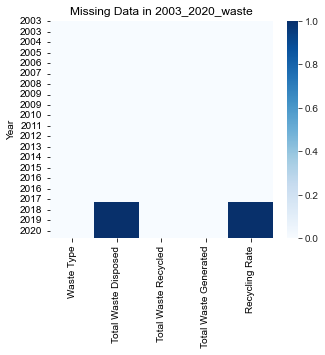

In [21]:
# Check for Missing values
print(df_concat.set_index("Year").isnull().sum())
# Heatmap to Identify the Missing values
plt.subplots(figsize=(5,4))  
sns.set_style('whitegrid')
sns.heatmap(df_concat.set_index("Year").isnull(), cmap = 'Blues')
plt.title("Missing Data in 2003_2020_waste")
plt.show()
# using the index, we can see what was expected
# columns "Total Waste Disposed" & "Recycling Rate" has missing values starting from the year 2018 @ index 225

Here, we can see that there're <strong>45 null values</strong> under "Total Waste Disposed" & "Total Waste Generated"
<br>which is <u>expected</u> as those columns were missing in dataset 2 (From 2018 to 2020)
<br>We will also visualise it using a <u>heatmap</u> to confirm that it is from the rows containing the years 2018 to 2020

<hr>
<h5>- We will now handle the missing values, as these are important for our analysis</h5>
These missing values can be <u>calculated</u> using the columns of "Total Waste Generated" & "Total Waste Recycled" from dataset 2

In [22]:
# Handle Missing Values, as these are precious data for our analysis
# we are able to calculate for these missing values 
# by using the cols "Total Waste Generated" & "Total Waste Recycled"

# Handle Missing Values under "Total Waste Disposed"
df_concat.loc[225:, "Total Waste Disposed"] = df_concat.loc[225:, "Total Waste Generated"] - df_concat.loc[225:, "Total Waste Recycled"]

# Handle Missing Values under "Recycling Rate", precision to 2dp
df_concat.loc[225:, "Recycling Rate"] = (df_concat.loc[225:, "Total Waste Recycled"] / df_concat.loc[225:, "Total Waste Generated"]).apply(lambda x: x - x % 0.01)

# Change dtype to int for "Total Waste Disposed"
df_concat["Total Waste Disposed"] = df_concat['Total Waste Disposed'].apply(lambda x: int(x))
print(df_concat.isnull().sum())

Waste Type               0
Total Waste Disposed     0
Total Waste Recycled     0
Total Waste Generated    0
Recycling Rate           0
Year                     0
dtype: int64


<hr>
<p>Convert dtype of "Total Waste Recycled" to Integer</p>

In [23]:
df_concat['Total Waste Recycled'] = df_concat['Total Waste Recycled'].apply(lambda x: int(x))
df_concat

,Waste Type,Total Waste Disposed,Total Waste Recycled,Total Waste Generated,Recycling Rate,Year
0,Horticultural,185300,119300,304600,0.39,2003
1,Paper/Cardboard,618500,466200,1084700,0.43,2003
2,Plastics,540800,39100,579900,0.07,2003
3,Construction & Demolition,24600,398300,422900,0.94,2003
4,Wood,172600,40800,213400,0.19,2003
...,...,...,...,...,...,...
265,Plastics,832000,36000,868000,0.04,2020
266,Ferrous metal,4000,930000,934000,0.99,2020
267,Paper/Cardboard,712000,432000,1144000,0.37,2020
268,Wood,109000,195000,304000,0.64,2020


<hr>
<p>Set Index to "Year" & "Waste Type"</p>

In [24]:
df_concat.set_index(["Year"], inplace=True)
df_concat

,Waste Type,Total Waste Disposed,Total Waste Recycled,Total Waste Generated,Recycling Rate
Year,,,,,
2003,Horticultural,185300,119300,304600,0.39
2003,Paper/Cardboard,618500,466200,1084700,0.43
2003,Plastics,540800,39100,579900,0.07
2003,Construction & Demolition,24600,398300,422900,0.94
2003,Wood,172600,40800,213400,0.19
...,...,...,...,...,...
2020,Plastics,832000,36000,868000,0.04
2020,Ferrous metal,4000,930000,934000,0.99
2020,Paper/Cardboard,712000,432000,1144000,0.37


<hr>
<h5>- We are done cleaning & preparing this concatenated dataset for analysis</h5>
<h4>Save this new cleaned dataset to a file named <u>'cleaned_2003_2020_waste.csv'</u></h4>

In [25]:
# Save Cleaned DataFrame to a new File
df_concat.to_csv('cleaned_2003_2020_waste.csv')

<hr>
<h2><strong>Dataset 3 (ghg-emissions.csv)</strong></h2>

<h4>Nature of Dataset 3</h4>

In [26]:
# ** Nature of Dataset 3 **
# First look at Dataset 3
df3

,Gas,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,CH4,MtCO2e,1.15,1.18,1.22,1.26,1.30,1.33,1.37,1.42,...,2.45,2.54,2.62,2.71,2.79,2.88,2.96,3.03,3.11,3.19
1,CO2,MtCO2e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F-Gas,MtCO2e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N2O,MtCO2e,0.05,0.05,0.05,0.05,0.06,0.06,0.06,0.06,...,0.09,0.09,0.10,0.10,0.10,0.10,0.11,0.11,0.11,0.11


<hr>
<h4>Information of Dataset 3</h4>
(A) No. of Rows & Columns
(B) Column Names & Dtypes

In [27]:
# View information of dataset 3, use .info() to retrieve
# (A) number of rows & columns
# (B) column names & dtypes

print("**** Gases Produced from Singapore Waste from 1990 to 2019 ****")
print("\nInformation of dataset 3")
df3.info()

**** Gases Produced from Singapore Waste from 1990 to 2019 ****

Information of dataset 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gas     4 non-null      object 
 1   unit    4 non-null      object 
 2   1990    2 non-null      float64
 3   1991    2 non-null      float64
 4   1992    2 non-null      float64
 5   1993    2 non-null      float64
 6   1994    2 non-null      float64
 7   1995    2 non-null      float64
 8   1996    2 non-null      float64
 9   1997    2 non-null      float64
 10  1998    2 non-null      float64
 11  1999    2 non-null      float64
 12  2000    2 non-null      float64
 13  2001    2 non-null      float64
 14  2002    2 non-null      float64
 15  2003    2 non-null      float64
 16  2004    2 non-null      float64
 17  2005    2 non-null      float64
 18  2006    2 non-null      float64
 19  2007    2 non-null      flo

<hr>
<h4>Summary Descriptive Statistics of Dataset 3</h4>

In [28]:
# Summary Statistics
# exlcude columns gas & unit
for col in df3.columns[2:]:
    print(f"** {col} descriptive summary **")
    print(df3[col].describe(include="all", datetime_is_numeric=True), "\n\n")

** 1990 descriptive summary **
count    2.000000
mean     0.600000
std      0.777817
min      0.050000
25%      0.325000
50%      0.600000
75%      0.875000
max      1.150000
Name: 1990, dtype: float64 


** 1991 descriptive summary **
count    2.000000
mean     0.615000
std      0.799031
min      0.050000
25%      0.332500
50%      0.615000
75%      0.897500
max      1.180000
Name: 1991, dtype: float64 


** 1992 descriptive summary **
count    2.000000
mean     0.635000
std      0.827315
min      0.050000
25%      0.342500
50%      0.635000
75%      0.927500
max      1.220000
Name: 1992, dtype: float64 


** 1993 descriptive summary **
count    2.000000
mean     0.655000
std      0.855599
min      0.050000
25%      0.352500
50%      0.655000
75%      0.957500
max      1.260000
Name: 1993, dtype: float64 


** 1994 descriptive summary **
count    2.000000
mean     0.680000
std      0.876812
min      0.060000
25%      0.370000
50%      0.680000
75%      0.990000
max      1.300000
Name:

<hr>
<h2><strong><u>Pre-Process</u> & <u>Clean</u> Dataset 3</strong></h2>
# Reshape Dataset <br>
# Identify and handle missing values<br>
# Identify and handle outliers<br>
# Writing final cleaned dataset to a file<br>

<hr>
<h4>(A) Reshape Dataset 3</h4>

In [29]:
# Drop "unit" column
df3_v1 = df3.drop(['unit'], axis=1)
# Transpose to make gas & the years the rows
df3_v1 = df3_v1.T

# set column names to values under Gas row at index 0
df3_v1.columns = df3_v1.iloc[0]
# remove that row, which is now set as the column headers
df3_v1 = df3_v1[1:]
# set index name to Year
df3_v1.index.name = "Year"
# Columns are the Gases
# Rows are the years
df3_v1

Gas,CH4,CO2,F-Gas,N2O
Year,,,,
1990,1.15,NaN,NaN,0.05
1991,1.18,NaN,NaN,0.05
1992,1.22,NaN,NaN,0.05
1993,1.26,NaN,NaN,0.05
1994,1.3,NaN,NaN,0.06
1995,1.33,NaN,NaN,0.06
1996,1.37,NaN,NaN,0.06
1997,1.42,NaN,NaN,0.06
1998,1.46,NaN,NaN,0.07


<hr>
<h4>(B) Checking for Missing Values in Dataset 3</h4>

** Detecting Missing Values in Dataset 3 **
Gas
CH4       0
CO2      30
F-Gas    30
N2O       0
dtype: int64


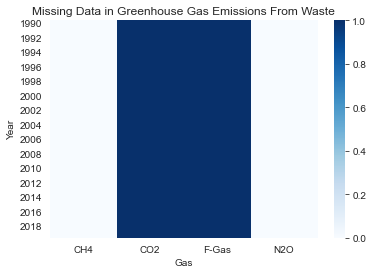

In [30]:
# (A) Check for missing values in both Datasets **
print('** Detecting Missing Values in Dataset 3 **')
print(df3_v1.isnull().sum())

# Heatmap to Identify the Missing values
plt.subplots(figsize=(6,4)) 
sns.set_style('whitegrid')
sns.heatmap(df3_v1.isnull(), cmap = 'Blues')
plt.title("Missing Data in Greenhouse Gas Emissions From Waste")
plt.show()

We can see that the null values are from the gas columns "CO2" & "F-Gas"
<h4>Handle Missing Values in Dataset 3</h4>
We will <strong>drop all these null values</strong><br>
<br>Because it is said that the <strong>more significant greenhouse gases</strong> produced from waste is <strong>Methane(CH4) & Nitrous Oxide(N20)</strong>

In [31]:
df3_v2 = df3_v1.drop(['CO2', 'F-Gas'], axis = 1)
df3_v2

Gas,CH4,N2O
Year,,
1990,1.15,0.05
1991,1.18,0.05
1992,1.22,0.05
1993,1.26,0.05
1994,1.3,0.06
1995,1.33,0.06
1996,1.37,0.06
1997,1.42,0.06
1998,1.46,0.07


<hr>
<h4>Check for Outliers in Dataset 3 Using Boxplot</h4>

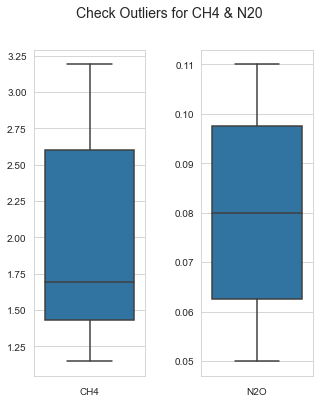

In [32]:
sns.set_style('whitegrid')
# figure with 2 subplots in a row
fig, ax = plt.subplots(1, 2, figsize=(5, 6))
fig.suptitle("Check Outliers for CH4 & N20", fontsize=14)

# add padding between subplots
plt.subplots_adjust(wspace=0.5) 

# 1st subplot
sns.boxplot(data=df3_v2['CH4'], ax=ax[0])
ax[0].set_xlabel('CH4')

# 2nd subplot
sns.boxplot(data=df3_v2['N2O'], ax=ax[1])
ax[1].set_xlabel('N2O')

# remove default xlabel start at 0
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

There are no outliers in under 'CH4' & 'N2O'

<hr>
<h4>Information of Cleaned Dataset 3</h4>
(A) No. of rows & columns (B) Column names & Dtypes

In [33]:
# View information of Reshaped dataset 3,
# (A) number of rows & columns
# (B) column names & dtypes
df3_v2.info()

# dtype of values have been converted to object
# let's change it back to float
df3_v2['CH4'] = df3_v2['CH4'].apply(lambda x: float(x))
df3_v2['N2O'] = df3_v2['N2O'].apply(lambda x: float(x))
print("\n")
df3_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1990 to 2019
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CH4     30 non-null     object
 1   N2O     30 non-null     object
dtypes: object(2)
memory usage: 720.0+ bytes


<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1990 to 2019
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CH4     30 non-null     float64
 1   N2O     30 non-null     float64
dtypes: float64(2)
memory usage: 720.0+ bytes


<hr>
<h4>Summary Descriptive Statistics of Cleaned Dataset 3</h4>

In [34]:
# Summary Statistics
for col in df3_v2.columns:
    print(f"** {col} descriptive summary **")
    print(df3_v2[col].describe(include="all", datetime_is_numeric=True), "\n\n")

** CH4 descriptive summary **
count    30.000000
mean      1.985000
std       0.673594
min       1.150000
25%       1.430000
50%       1.695000
75%       2.600000
max       3.190000
Name: CH4, dtype: float64 


** N2O descriptive summary **
count    30.000000
mean      0.080333
std       0.019737
min       0.050000
25%       0.062500
50%       0.080000
75%       0.097500
max       0.110000
Name: N2O, dtype: float64 




<hr>
<h5>- We are done cleaning & preparing Dataset 3 for analysis</h5>
<h4>Save new cleaned dataset to file named <u>'cleaned_ghg-emissions.csv'</u></h4>

In [35]:
df3_v2

Gas,CH4,N2O
Year,,
1990,1.15,0.05
1991,1.18,0.05
1992,1.22,0.05
1993,1.26,0.05
1994,1.30,0.06
1995,1.33,0.06
1996,1.37,0.06
1997,1.42,0.06
1998,1.46,0.07


In [36]:
# Save Cleaned DataFrame to a new File
df3_v2.to_csv('cleaned_ghg-emissions.csv')

<hr>
<h2><strong>Dataset 4 (solid-waste-management-total-waste-incinerated.csv)</strong></h2>

<h4>Nature of Dataset 4</h4>

According to data.gov.sg, values under "total_waste_incinerated" are in million tonnes

In [37]:
# Nature of Dataset 4
# First look at Dataset 4
df4

,total_waste_incinerated
year,
2000,2.44
2001,2.55
2002,2.42
2003,2.31
2004,2.26
2005,2.28
2006,2.33
2007,2.38
2008,2.45


<hr>
<h4>Information of Dataset 4</h4>
(A) No. of Rows & Columns
(B) Column Names & Dtypes

In [38]:
# View information of dataset 2, use .info() to retrieve
# (A) number of rows & columns
# (B) column names & dtypes

print("**** Total Waste Incinerated in Singapore from 2000 to 2015 ****")
print("\nInformation of dataset 4")
df4.info()

**** Total Waste Incinerated in Singapore from 2000 to 2015 ****

Information of dataset 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 2000 to 2015
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_waste_incinerated  16 non-null     float64
dtypes: float64(1)
memory usage: 256.0 bytes


<hr>
<h4>Summary Descriptive Statistics of Dataset 4</h4>

In [39]:
# Summary Statistics
for col in df4.columns:
    print(f"** {col} descriptive summary **")
    print(df4[col].describe(include="all", datetime_is_numeric=True), "\n\n")

** total_waste_incinerated descriptive summary **
count    16.000000
mean      2.525000
std       0.204222
min       2.260000
25%       2.367500
50%       2.465000
75%       2.677500
max       2.870000
Name: total_waste_incinerated, dtype: float64 




<hr>
<h2><strong><u>Pre-Process</u> & <u>Clean</u> Dataset 4</strong></h2>
# Identify and handle missing values<br>
# Identify and handle outliers<br>

<hr>
<h4>(A) Checking for Missing Values in Dataset 4</h4>

In [40]:
print('** Detecting Missing Values in Dataset 4 **')
print(df4.isnull().sum())

** Detecting Missing Values in Dataset 4 **
total_waste_incinerated    0
dtype: int64


<hr>
<h4>(B) Checking for Outliers in Dataset 4</h4>

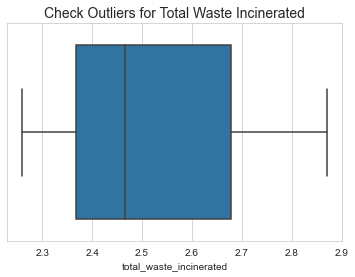

In [41]:
# use histogram / boxplot to check for any outliers
# check for outliers
sns.boxplot(x = df4["total_waste_incinerated"])
plt.title("Check Outliers for Total Waste Incinerated", fontsize=14)
plt.show()

There are no outliers

<hr>
<h2><strong>Dataset 5 (solid-waste-management-total-waste-landfilled-annual.csv)</strong></h2>

<h4>Nature of Dataset 5</h4>

According to data.gov.sg, values under "total_waste_landfilled" are in million tonnes

In [42]:
# Nature of Dataset 5
# First look at dataset 5
df5

,total_waste_landfilled
year,
2000,0.36
2001,0.25
2002,0.20
2003,0.19
2004,0.22
2005,0.27
2006,0.23
2007,0.19
2008,0.18


<hr>
<h4>Information of Dataset 5</h4>
(A) No. of Rows & Columns
(B) Column Names & Dtypes

In [43]:
# View information of dataset 5, use .info() to retrieve
# (A) number of rows & columns
# (B) column names & dtypes

print("**** Total Waste Landfilled in Singapore from 2000 to 2015 ****")
print("\nInformation of dataset 5")
df5.info()

**** Total Waste Landfilled in Singapore from 2000 to 2015 ****

Information of dataset 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 2000 to 2015
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_waste_landfilled  16 non-null     float64
dtypes: float64(1)
memory usage: 256.0 bytes


<hr>
<h4>Summary Descriptive Statistics of Dataset 5</h4>

In [44]:
# Summary Statistics
for col in df5:
    print(f"** {col} descriptive summary **")
    print(df5[col].describe(include="all", datetime_is_numeric=True), "\n\n")

** total_waste_landfilled descriptive summary **
count    16.000000
mean      0.210625
std       0.049996
min       0.150000
25%       0.187500
50%       0.200000
75%       0.222500
max       0.360000
Name: total_waste_landfilled, dtype: float64 




<hr>
<h2><strong><u>Pre-Process</u> & <u>Clean</u> Dataset 5</strong></h2>
# Identify and handle missing values<br>
# Identify and handle outliers<br>

<hr>
<h4>(A) Checking for Missing Values in Dataset 5</h4>

In [45]:
print('** Detecting Missing Values in Dataset 5 **')
print(df5.isnull().sum())

** Detecting Missing Values in Dataset 5 **
total_waste_landfilled    0
dtype: int64


<hr>
<h4>(B) Checking for Outliers in Dataset 5</h4>

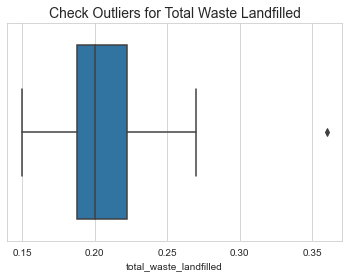

In [46]:
# use histogram / boxplot to check for any outliers
# check for outliers
sns.boxplot(x = df5["total_waste_landfilled"])
plt.title("Check Outliers for Total Waste Landfilled", fontsize=14)
plt.show()

There is one outlier, but we will ignore it as we want to see how Singapore is managing waste sent to the landfill.

<hr>
<h5>Dataset 4 & 5 are related to <strong>Waste Disposal</strong> across the years 2000 to 2015</h5>
<h5>Hence, we are going to <strong>concatenate the two datasets together</strong><h5>

In [47]:
# Concatenate Dataset 4 & 5 **
df4_5concat = pd.concat([df4, df5], axis=1)
df4_5concat

,total_waste_incinerated,total_waste_landfilled
year,,
2000,2.44,0.36
2001,2.55,0.25
2002,2.42,0.20
2003,2.31,0.19
2004,2.26,0.22
2005,2.28,0.27
2006,2.33,0.23
2007,2.38,0.19
2008,2.45,0.18


<hr>
<h5>- We are done cleaning & preparing dataset 4 & 5 for analysis</h5>
<h4>Save new concatenated & cleaned dataset to a file named <u>'cleaned_solid-waste-management-total-waste-landfilled-annual.csv'</u></h4>

In [48]:
# Save Cleaned DataFrame to a new File
df4_5concat.to_csv('cleaned_solid-waste-management-total-waste-landfilled-and-incinerated.csv')

<hr>
<h1>End of Data Cleaning & Wrangling</h1>
<p>Final No. of Datasets: 3</p>
1. cleaned_2003_2020_waste.csv<br>
2. cleaned_ghg-emissions.csv<br>
3. cleaned_solid-waste-management-total-waste-landfilled-and-incinerated.csv